In [6]:
!pip install torch torchvision

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [8]:
# Define transformation: Resize images to 4x4
transform = transforms.Compose([
    transforms.Resize((4, 4)),   # Downscaling to 4x4
    transforms.ToTensor(),
])

# Load MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_set = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)


In [9]:
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)  # 1 input channel (grayscale), 8 filters
        self.fc1 = nn.Linear(8 * 4 * 4, 10)  # Fully connected layer for classification

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Apply convolution + activation
        x = x.view(x.size(0), -1)  # Flatten before feeding into FC layer
        x = self.fc1(x)
        return x


In [10]:
model = SmallCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [11]:
n_epochs = 10
train_losses = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/10, Loss: 1.2658
Epoch 2/10, Loss: 0.7885
Epoch 3/10, Loss: 0.7110
Epoch 4/10, Loss: 0.6692
Epoch 5/10, Loss: 0.6395
Epoch 6/10, Loss: 0.6151
Epoch 7/10, Loss: 0.5937
Epoch 8/10, Loss: 0.5750
Epoch 9/10, Loss: 0.5597
Epoch 10/10, Loss: 0.5454


In [12]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 83.40%


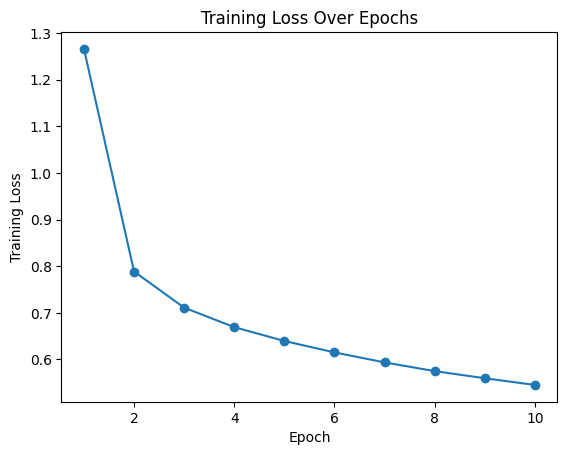

In [13]:
plt.plot(range(1, n_epochs + 1), train_losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.show()
